# Qual a acertividade das previsões publicadas pelo BACEN?

O Banco Central publica semanalmente um boletim contendo as estatísticas calculadas considerando as expectativas de mercado para os principais índices econômicos brasileiros, que contém valores para o ano corrente e os próximos, chamado Relatório Focus.

Os valores apontados no relatório tem como origem diversos agentes econômicos que não fazem parte deste órgão, como instituições financeiras, empresas e universidades.

Estas previsões são impactadas por fatores externos de baixa ou nenhuma previsibilidade como a pandemia de COVID-19, guerra na Ucrânia, resultados de eleições, entre outros, que causam variações em seus números.

Mesmo assim, é válido entender quão acertivas são estas expectativas de mercado, já que elas ajudam a nortear os planejamentos financeiros/estratégicos de diversas empresas e pessoas, nos mais variados ramos de atuação.



In [1]:
# Bibliotecas a serem utilizadas
import pandas as pd
from datetime import datetime as dt
from IPython.display import IFrame
from pybacen.bacen import time_series
import matplotlib.pyplot as plt

# Fonte de dados

## Sistema Expectativas de Mercado

Para captura das previsões de mercado, o BACEN disponibiliza uma plataforma (https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/aplicacao#!/recursos) que possibilita montar consultas a serem feitas em sua API apenas selecionando o peíodo desejado, e posteriormente os parâmetros.

O endereço base da API é ``https ://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/[codigo_recurso]?$format=json&[Outros Parâmetros]``, considerando os códigos de recursos abaixo.

> ExpectativaMercadoMensais, ExpectativasMercadoTrimestrais, ExpectativasMercadoAnuais, ExpectativasMercadoInflacao12Meses, ExpectativasMercadoTop5Mensais, ExpectativasMercadoTop5Anuais, ExpectativasMercadoInstituicoes

Então, basta usar o link obtido para efetuar a consulta e analisar os dados.

In [2]:

IFrame(
    'https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/aplicacao#!/recursos', 
    width='100%', 
    height=250
)

In [3]:
IFrame(
    'https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/aplicacao#!' \
    '/recursos/ExpectativasMercadoAnuais#eyJmb3JtdWxhcmlvIjp7IiRmb3JtYXQiOiJqc29uIiwiJHRvcCI6MTAwfX0=',
    width='100%',
    height=250
)

## Histórico dos índices

Situação similar ocorre para os dados reais, onde existe uma API chamada BCData/SGS - Sistema Gerenciador de Séries Temporais, conforme exemplo a seguir.

As consultas são feitas utilizando o endereço padrão ``http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={dataInicial}&dataFinal={dataFinal}``.

In [4]:
IFrame(
    'https://dadosabertos.bcb.gov.br/dataset/24363-indice-de-atividade-economica-do-banco-central' \
    '---ibc-br/resource/7d5869ad-b479-47d3-b98f-b99d8d008d5b',
    width='100%',
    height=250
)

Para encontrar o código da série deseja existem dois métodos, diretamente na plataforma do BACEN [``https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries``](https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries), ou utilizando a biblioteca `pybacen`.

Na plataforma do BACEN, basta inserir o nome do indicador no campo "Pesquisa textual", avaliar qual indicador mais se adequa a necessidade e usar seu código na API.

<img src="img/pesquisa_indicador_sgs.png" alt="Sistema Gerenciador de Séries Temporais" style="width: 100%;"/>

Na biblioteca ``pybacen`` a pesquisa se torna um pouco mais acertiva, porque é possível pesquisar partes do nome do indicador, bem como escolher a unidade, periodicidade e fonte.

O resultado da pesquisa é um DataFrame do pandas, e nem sempre o nome do indicador (nm_serie) aparecerá completo. Para resolver isto, é possível tirar o limitador de caracteres exibidos no DataFrame (o padrão é 50) utilizando o método ``pd.options.display.max_colwidth = None``.

Despois de realizar a pesquisa, é interessante voltar para o padrão, pra evitar DataFrames muito grandes e de difícil entendimento.

Outro ponto a considerar é o aviso que é exibido a cada pesquisa, informando para confirmar a informação diretamente no site do BACEN.

In [5]:
pd.options.display.max_colwidth = None

In [6]:
time_series.read_bacen_code(search_text='%ipca%12 meses', period='M')

c:\users\thiago.cunha\appdata\local\programs\python\python38\lib\site-packages\pybacen\bacen\time_series.py:116: UserWarning: Check the website: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
  warn('Check the website: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries')


,bacen_code,nm_serie,unit,periodicity,source,special
11820,13522,Índice nacional de preços ao consumidor - amplo (IPCA) - em 12 meses,%,M,IBGE,N


In [7]:
time_series.read_bacen_code(search_text='%meta%selic%')

c:\users\thiago.cunha\appdata\local\programs\python\python38\lib\site-packages\pybacen\bacen\time_series.py:116: UserWarning: Check the website: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
  warn('Check the website: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries')


,bacen_code,nm_serie,unit,periodicity,source,special
405,432,Taxa de juros - Meta Selic definida pelo Copom,% a.a.,D,Copom,N


In [8]:
pd.options.display.max_colwidth = 50

# Captura dos dados e construção das tabelas/DataFrames

Para iniciar a análise da acertividade das previsões é necessário estabelecer quais indicadores e períodos serão utilizados.

Num primeiro momento, serão analisados dois indicadores, o IPCA (inflação) e a Selic (juros), comparando o valor real de fechamento de cada ano, com sua previsão publicada no início deste ano e do anterior, considerando os últimos 20 anos (2001 a 2021, já que 2022 ainda não está fechado no momento da análise).

Por exemplo:

> IPCA dez/2021, comparado com a previsão deste publicada em jan/2021 e jan/2020


## Expectativas de mercado

No caso das Expectativas de Mercado, o resultado da consulta é a relação de todos os indicadores de acordo com a quantidade de linhas determinadas e os parâmetros estabelecidos.

In [9]:
# Definindo os indicadores

indices = ['IPCA', 'Selic']

# Definindo os parâmetros e efetuando a consulta
codigo = 'ExpectativasMercadoAnuais'
link_api =  "https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata" \
            f"/{codigo}?$format=json&$select=Indicador,Data,DataReferencia,Media,Mediana," \
            "DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo"


# Capturando os dados e transformando

consulta_api = pd.read_json(link_api)
previsoes_indicadores = pd.json_normalize(consulta_api.value)
previsoes_indicadores.Data = [dt.strptime(previsoes_indicadores.Data[i], '%Y-%m-%d') 
                              for i in range(len(previsoes_indicadores.Data))]
previsoes_indicadores = previsoes_indicadores.astype({'DataReferencia': int})


# Aplicando filtros e criando o df a ser utilizado

filtro =    (previsoes_indicadores.Indicador.isin(indices)) & \
            (previsoes_indicadores.baseCalculo == 0) & \
            (previsoes_indicadores.Data >= '1998-01-01')
previsoes_indicadores_anuais = previsoes_indicadores[filtro]


# Selecionando apenas o primeiro dado divulgado em cada ano

ano_teste = previsoes_indicadores_anuais.Data.min().year
ultimo_ano = previsoes_indicadores_anuais.Data.max().year
lista_datas = []

while ano_teste <= ultimo_ano: 
    filtro_jan =    (previsoes_indicadores_anuais.Data >= f'{ano_teste}-01-01') & \
                    (previsoes_indicadores_anuais.Data <= f'{ano_teste}-01-31')
    menor_data_jan = previsoes_indicadores_anuais.Data[filtro_jan].min()
    lista_datas.append(menor_data_jan)
 
    ano_teste += 1
    
previsoes_indicadores_anuais = previsoes_indicadores_anuais[previsoes_indicadores_anuais.Data.isin(lista_datas)]
previsoes_indicadores_anuais.reset_index(drop=True, inplace=True)


# Criando a coluna com a informação da referência divulgada

def TestaAno():
    lista = []
    for i in range(len(previsoes_indicadores_anuais.Data)):
        if previsoes_indicadores_anuais.Data[i].year == previsoes_indicadores_anuais.DataReferencia[i]:
            lista.append('Inicio ano')
        elif previsoes_indicadores_anuais.Data[i].year == previsoes_indicadores_anuais.DataReferencia[i] - 1:
            lista.append('Ano anterior')
        else:
            lista.append('Fora do range')
    return lista

previsoes_indicadores_anuais['InfoReferencia'] = TestaAno()


# Pivoteando as tabelas e unificando

ipca_tabela_previsao_final = pd.pivot_table(previsoes_indicadores_anuais.query('Indicador == "IPCA"'), 
                                            values= 'Mediana', 
                                            index= 'DataReferencia',
                                            columns= 'InfoReferencia').reset_index()

ipca_tabela_previsao_final = ipca_tabela_previsao_final[['DataReferencia', 'Ano anterior', 'Inicio ano']]
ipca_tabela_previsao_final.columns = ['DataReferencia', 'IPCA ano anterior', 'IPCA inicio do ano']

selic_tabela_previsao_final = pd.pivot_table(previsoes_indicadores_anuais.query('Indicador == "Selic"'), 
                                             values= 'Mediana', 
                                             index= 'DataReferencia',
                                             columns= 'InfoReferencia').reset_index()

selic_tabela_previsao_final = selic_tabela_previsao_final[['DataReferencia', 'Ano anterior', 'Inicio ano']]
selic_tabela_previsao_final.columns = ['DataReferencia', 'Selic ano anterior', 'Selic inicio do ano']
tabela_expectativas = pd.merge(ipca_tabela_previsao_final, selic_tabela_previsao_final, how= 'left', on= 'DataReferencia')

In [10]:
tabela_expectativas.sample(10)

,DataReferencia,IPCA ano anterior,IPCA inicio do ano,Selic ano anterior,Selic inicio do ano
4,2004,8.0,6.0000,17.00,13.85
13,2013,5.0,5.4900,10.25,7.25
22,2022,3.5,5.0296,4.75,11.50
7,2007,4.5,4.0000,13.50,11.75
10,2010,4.5,4.5000,11.50,11.00
1,2001,NaN,4.3000,NaN,14.00
8,2008,4.1,4.3000,11.00,10.75
9,2009,4.0,5.0000,10.00,12.00
25,2025,NaN,NaN,NaN,NaN
12,2012,4.5,5.3400,10.75,9.50


In [11]:
tabela_expectativas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DataReferencia       26 non-null     int64  
 1   IPCA ano anterior    22 non-null     float64
 2   IPCA inicio do ano   23 non-null     float64
 3   Selic ano anterior   22 non-null     float64
 4   Selic inicio do ano  23 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.2 KB


### Dados reais

Pesquisando os indicadores que serão analisados, cheguei nos códigos 13552 (IPCA 12 meses) e 432 (Meta Selic).

In [12]:
# Captura dos dados na API
codigo_ipca_12_meses = 13522
data_inicial = '01012000'
data_final = '31122099'
ipca_12_meses_json =    'http://api.bcb.gov.br/dados/serie/' \
                        f'bcdata.sgs.{codigo_ipca_12_meses}/dados?' \
                        f'formato=json&dataInicial={data_inicial}&dataFinal={data_final}'

codigo_meta_selic = 432
meta_selic_json =   'http://api.bcb.gov.br/dados/serie/' \
                    f'bcdata.sgs.{codigo_meta_selic}/dados?' \
                    f'formato=json&dataInicial={data_inicial}&dataFinal={data_final}'

# Inclusão dos dados em DataFrames
ipca_12_meses = pd.read_json(ipca_12_meses_json).set_index('data')
meta_selic = pd.read_json(meta_selic_json).set_index('data')

# Unindo os dados obtidos
df_indicadores_reais = pd.concat([ipca_12_meses, meta_selic], axis = 1, join = 'inner').reset_index()
df_indicadores_reais.reset_index()
df_indicadores_reais.columns = ['Data', 'IPCA', 'MetaSelic']
df_indicadores_reais['Ano'] = df_indicadores_reais.Data.apply(lambda x: int(x.rsplit('/',1)[1]))
df_indicadores_reais_fechamento_ano = df_indicadores_reais[df_indicadores_reais.Data.str.contains('/12/')]
df_indicadores_reais_fechamento_ano.sample(10)

,Data,IPCA,MetaSelic,Ano
59,01/12/2004,7.60,17.25,2004
263,01/12/2021,10.06,7.75,2021
107,01/12/2008,5.90,13.75,2008
119,01/12/2009,4.31,8.75,2009
239,01/12/2019,4.31,5.00,2019
23,01/12/2001,7.67,19.00,2001
95,01/12/2007,4.46,11.25,2007
191,01/12/2015,10.67,14.25,2015
83,01/12/2006,3.14,13.25,2006
179,01/12/2014,6.41,11.25,2014


In [13]:
df_indicadores_reais_fechamento_ano.shape

(22, 4)

In [14]:
df_indicadores_reais_fechamento_ano.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 11 to 263
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data       22 non-null     object 
 1   IPCA       22 non-null     float64
 2   MetaSelic  22 non-null     float64
 3   Ano        22 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 880.0+ bytes


## Unindo as tabelas e iniciando o comparativo

Com os dados apurados, basta unir as tabelas e iniciar um comparativo para demonstrar o quão acertivo foram as previsões.

Vale lembrar que a ideia não é dizer que as previsões são erradas, mas sim levantar insights que direcionem a análise inicial para novas.

In [15]:
df_dados_finais = pd.merge(df_indicadores_reais_fechamento_ano, 
                           tabela_expectativas,
                           how = 'left', 
                           left_on = 'Ano',
                           right_on = 'DataReferencia')

df_dados_finais.drop('Ano', 
                     axis = 1, 
                     inplace = True)

df_dados_finais.rename(columns = {'IPCA ano anterior': 'PrevIpcaAnoAnterior',
                                  'IPCA inicio do ano': 'PrevIpcaInicioAno', 
                                  'Selic ano anterior': 'PrevSelicAnoAnterior',
                                  'Selic inicio do ano': 'PrevSelicInicioAno'},
                       inplace = True)

df_dados_finais.dropna(inplace = True)
df_dados_finais.reset_index(drop = True, inplace = True)
df_dados_finais.head()

,Data,IPCA,MetaSelic,DataReferencia,PrevIpcaAnoAnterior,PrevIpcaInicioAno,PrevSelicAnoAnterior,PrevSelicInicioAno
0,01/12/2002,12.53,22.00,2002,3.81,4.75,12.66,17.00
1,01/12/2003,9.30,17.50,2003,4.00,11.00,14.00,20.00
2,01/12/2004,7.60,17.25,2004,8.00,6.00,17.00,13.85
3,01/12/2005,5.69,18.50,2005,5.00,5.70,13.00,16.00
4,01/12/2006,3.14,13.25,2006,5.00,4.50,14.38,15.00


In [16]:
df_dados_finais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  20 non-null     object 
 1   IPCA                  20 non-null     float64
 2   MetaSelic             20 non-null     float64
 3   DataReferencia        20 non-null     int64  
 4   PrevIpcaAnoAnterior   20 non-null     float64
 5   PrevIpcaInicioAno     20 non-null     float64
 6   PrevSelicAnoAnterior  20 non-null     float64
 7   PrevSelicInicioAno    20 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.4+ KB


Com os dados unificados, basta iniciar o comparativo entre os dados reais e os previstos.

Primeiramente comparando os valores absolutos, plotando em um gráfico de linhas.

<AxesSubplot:title={'center':'Comparativo IPCA real e previsto'}, xlabel='DataReferencia'>

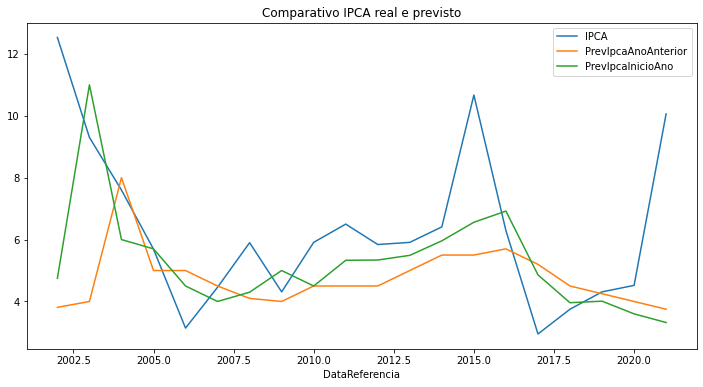

In [17]:
df_dados_finais[
    ['DataReferencia', 'IPCA', 'PrevIpcaAnoAnterior', 'PrevIpcaInicioAno']
].plot(x = 'DataReferencia', figsize = (12,6), title = 'Comparativo IPCA real e previsto')

<AxesSubplot:title={'center':'Comparativo Selic real e previsto'}, xlabel='DataReferencia'>

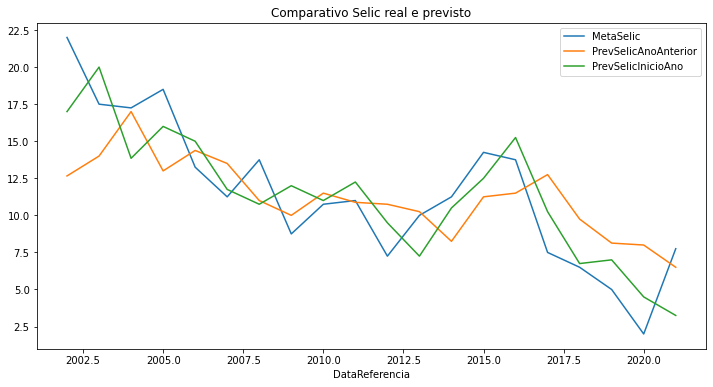

In [18]:
df_dados_finais[
    ['DataReferencia', 'MetaSelic', 'PrevSelicAnoAnterior', 'PrevSelicInicioAno']
].plot(x = 'DataReferencia', figsize = (12,6), title = 'Comparativo Selic real e previsto')

Olhando para os gráficos não é tão simples entender qual o tamanho da variação, por isto é interessante trazer duas novas visões, a primeira com a diferença entre os valores e a segunda com a diferença percentual.

In [19]:
df_dados_finais['DifRealPrevIpcaAnoAnterior'] = df_dados_finais.IPCA - df_dados_finais.PrevIpcaAnoAnterior
df_dados_finais['DifRealPrevIpcaInicioAno'] = df_dados_finais.IPCA - df_dados_finais.PrevIpcaInicioAno
df_dados_finais['DifRealPrevSelicAnoAnterior'] = df_dados_finais.MetaSelic - df_dados_finais.PrevSelicAnoAnterior
df_dados_finais['DifRealPrevSelicInicioAno'] = df_dados_finais.MetaSelic - df_dados_finais.PrevSelicInicioAno

In [254]:
resumo = df_dados_finais.iloc[:,8:].describe().T[['mean','50%','std','min','max']].round(2)
resumo

,mean,50%,std,min,max
DifRealPrevIpcaAnoAnterior,1.54,0.80,2.78,-2.25,8.72
DifRealPrevIpcaInicioAno,1.05,0.46,2.52,-1.91,7.78
DifRealPrevSelicAnoAnterior,0.21,-0.07,3.74,-6.00,9.34
DifRealPrevSelicInicioAno,0.15,-0.38,2.61,-3.25,5.00
DifPercentRealPrevIpcaAnoAnterior,12.77,13.16,36.06,-76.27,69.59
DifPercentRealPrevIpcaInicioAno,7.99,7.83,30.91,-64.75,67.00
DifPercentRealPrevSelicAnoAnterior,-19.41,-0.70,73.28,-300.00,42.45
DifPercentRealPrevSelicInicioAno,-7.40,-4.15,37.26,-125.00,58.06


In [235]:
def geraGrafico(dados, 
                titulo='', 
                titulo_eixo_y='', 
                unidade_medida_y = '',
                unidades_eixo_y = 1,
                distancia_media_mediana=1,
                deslocmax_x=0, 
                deslocmax_y = 0, 
                deslocmin_x=0, 
                deslocmin_y=0, 
                deslocmed_x=0, 
                deslocmed_y=0):   
    
    # Definindo os dados a serem apresentados
    x = df_dados_finais.DataReferencia
    y = dados

    # Estruturando o gráfico
    fig = plt.figure(figsize = (15,8))
    eixo = fig.add_axes([0,0,1,1])

    eixo.plot(x, y, color = 'darkblue', marker = 'o')
    eixo.set_title(titulo, fontsize = 25, pad = 20)
    eixo.set_xlabel('Ano', fontsize=20, labelpad = 10)
    eixo.set_ylabel(titulo_eixo_y, fontsize=20, labelpad = 10)
    eixo.grid(True, linewidth = 0.2)
    eixo.set_xlim(min(x) -1, max(x) +1)
    eixo.set_xticks(range(min(x) -1, max(x) +1))
    eixo.set_ylim(min(y) -1, max(y) +1)
    eixo.set_yticks(range(round(min(y)) -1, round(max(y)) +1, unidades_eixo_y))

    # Criando as linhas de máximo, mínimo e zero
    eixo.axhline(max(y), color = 'k', linestyle='--')
    eixo.axhline(min(y), color = 'k', linestyle='--')
    eixo.axhline(0, color = 'gray', linestyle='-')


    # Incluindo anotação no ponto em que está o máximo, distante da linha
    # e incluindo uma seta

    x1 = x[y.idxmax()]
    y1 = max(y)
    x2 = x[y.idxmax()] + 1.5 + deslocmax_x
    y2 = max(y) - 1 + deslocmax_y
    eixo.annotate(f'Máximo: {str(round(y1,2)) + unidade_medida_y}', xy = (x1, y1), fontsize=20, color = 'blue', 
                  xytext = (x2, y2), arrowprops={'facecolor' : 'blue'})

    # Incluindo anotação no ponto em que está o mínimo, distante da linha
    # e incluindo uma seta

    x1 = x[y.idxmin()]
    y1 = min(y)
    x2 = x[y.idxmin()] - 5 + deslocmin_x
    y2 = min(y) + 1 + deslocmin_y
    eixo.annotate(f'Mínimo: {str(round(y1,2)) + unidade_medida_y}', xy = (x1, y1), fontsize=20, color = 'red', 
                  xytext = (x2, y2), arrowprops = dict(facecolor = 'red'))

    # Incluindo a informação de média e mediana
    x1 = x.median() + 3.5 + deslocmed_x
    y1 = y.median() + 5 + deslocmed_y
    eixo.annotate(f'Média: {str(round(y.mean(),2)) + unidade_medida_y}', xy = (x1, y1), fontsize=25, color = 'k')
    x1 = x.median() + 3.5 + deslocmed_x
    y1 = y.median() + 5 + deslocmed_y + distancia_media_mediana
    eixo.annotate(f'Mediana: {str(round(y.median(),2)) + unidade_medida_y}', xy = (x1, y1), fontsize=25, color = 'k')

    plt.show()

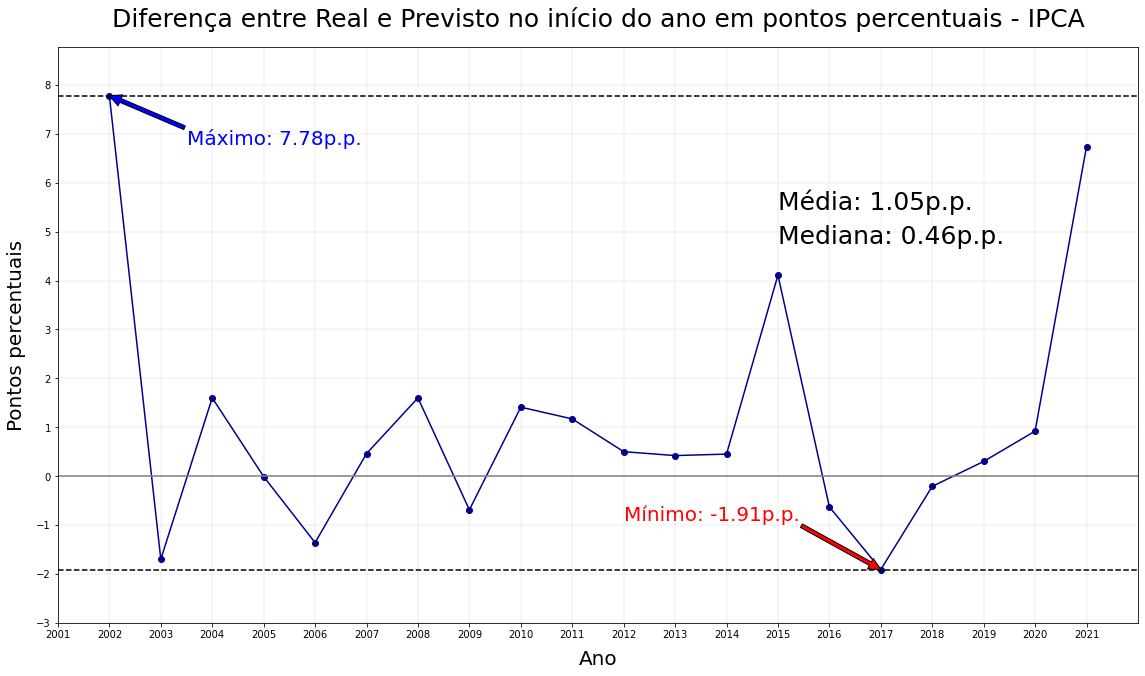

In [236]:
geraGrafico(
    df_dados_finais.DifRealPrevIpcaInicioAno, 
    titulo = 'Diferença entre Real e Previsto no início do ano em pontos percentuais - IPCA' ,
    titulo_eixo_y = 'Pontos percentuais',
    unidade_medida_y='p.p.',
    distancia_media_mediana = -.7
           )

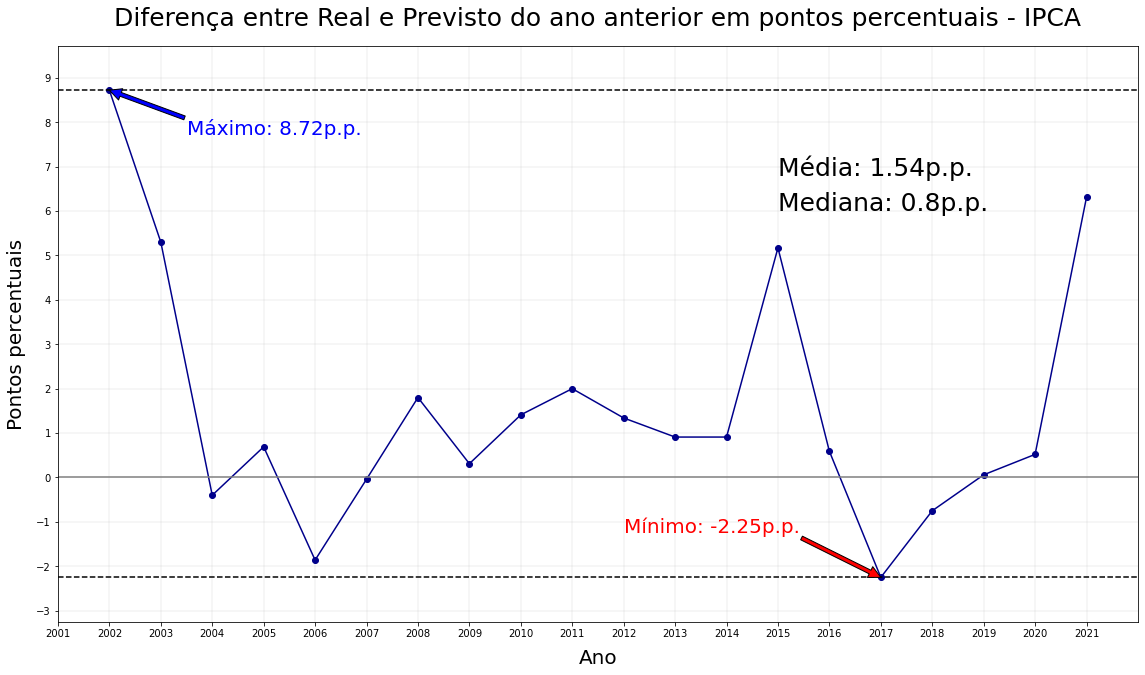

In [225]:
geraGrafico(
    df_dados_finais.DifRealPrevIpcaAnoAnterior,
    titulo = 'Diferença entre Real e Previsto do ano anterior em pontos percentuais - IPCA',
    titulo_eixo_y= 'Pontos percentuais',
    unidade_medida_y='p.p.',
    distancia_media_mediana=-.8,
    deslocmed_y=1
)

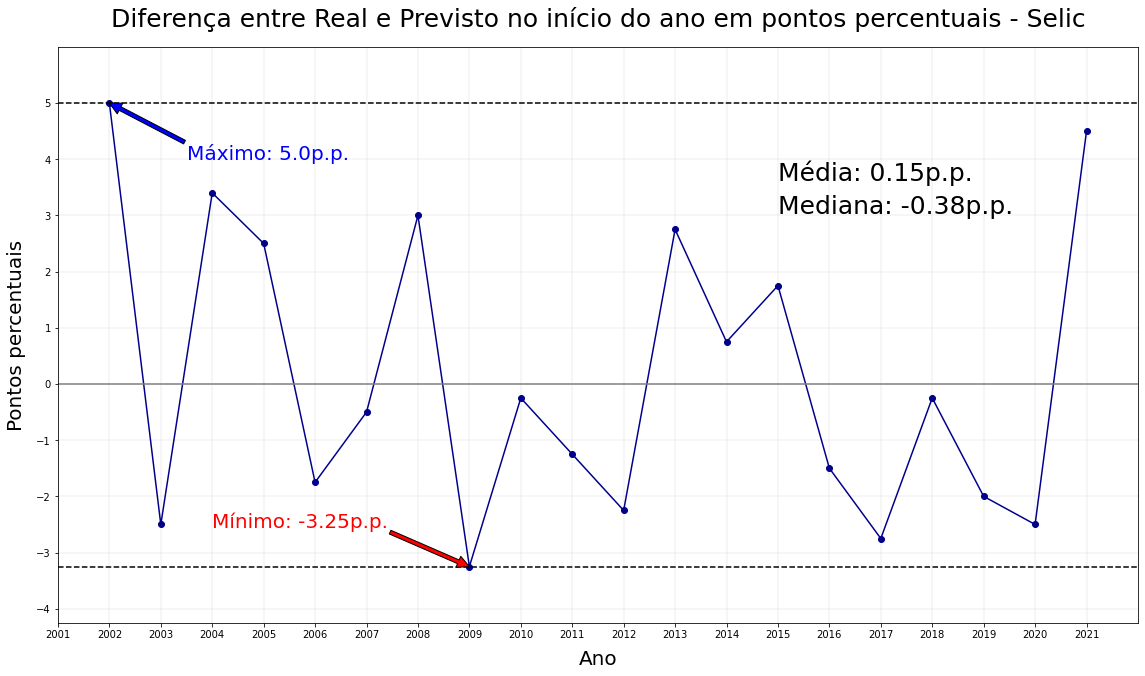

In [226]:
geraGrafico(
    df_dados_finais.DifRealPrevSelicInicioAno,
    titulo = 'Diferença entre Real e Previsto no início do ano em pontos percentuais - Selic',
    titulo_eixo_y = 'Pontos percentuais',
    unidade_medida_y='p.p.',
    distancia_media_mediana=-.6,
    deslocmed_y=-1,
    deslocmin_x=0,
    deslocmin_y=-0.3
)

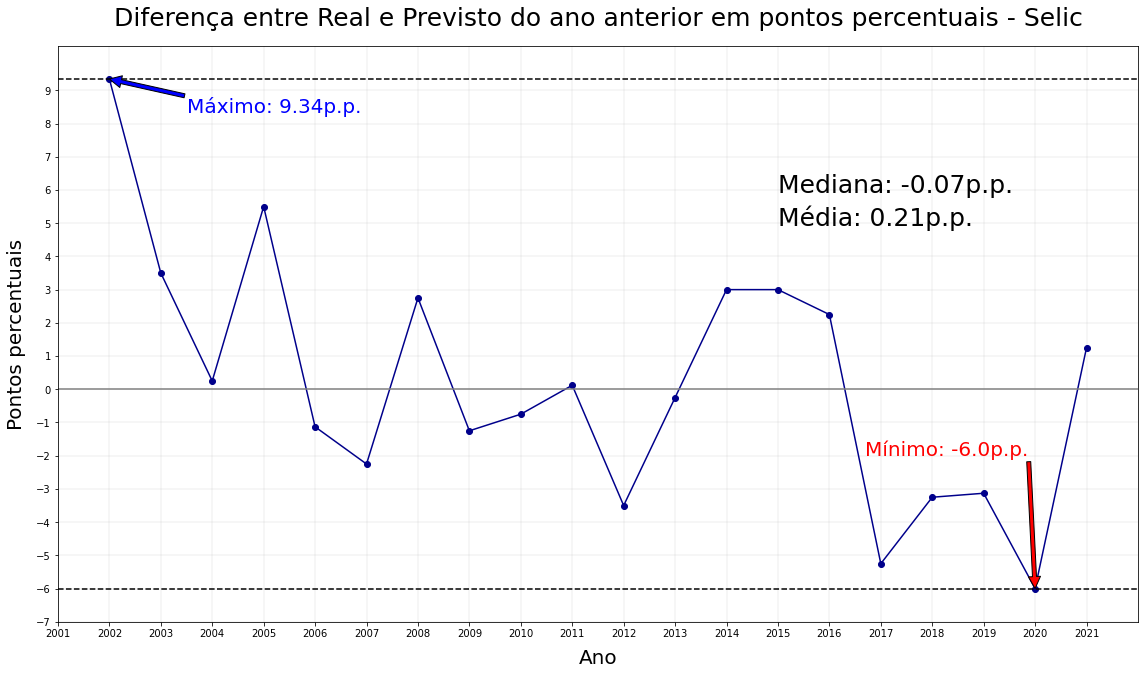

In [227]:
geraGrafico(
    df_dados_finais.DifRealPrevSelicAnoAnterior,
    titulo = 'Diferença entre Real e Previsto do ano anterior em pontos percentuais - Selic',
    titulo_eixo_y = 'Pontos percentuais',
    unidade_medida_y='p.p.',
    deslocmin_x=1.7,
    deslocmin_y=3
)

In [228]:
df_dados_finais['DifPercentRealPrevIpcaAnoAnterior'] = (df_dados_finais.DifRealPrevIpcaAnoAnterior / df_dados_finais.IPCA) * 100
df_dados_finais['DifPercentRealPrevIpcaInicioAno'] = (df_dados_finais.DifRealPrevIpcaInicioAno / df_dados_finais.IPCA) * 100
df_dados_finais['DifPercentRealPrevSelicAnoAnterior'] = (df_dados_finais.DifRealPrevSelicAnoAnterior / df_dados_finais.MetaSelic) * 100
df_dados_finais['DifPercentRealPrevSelicInicioAno'] = (df_dados_finais.DifRealPrevSelicInicioAno / df_dados_finais.MetaSelic) * 100

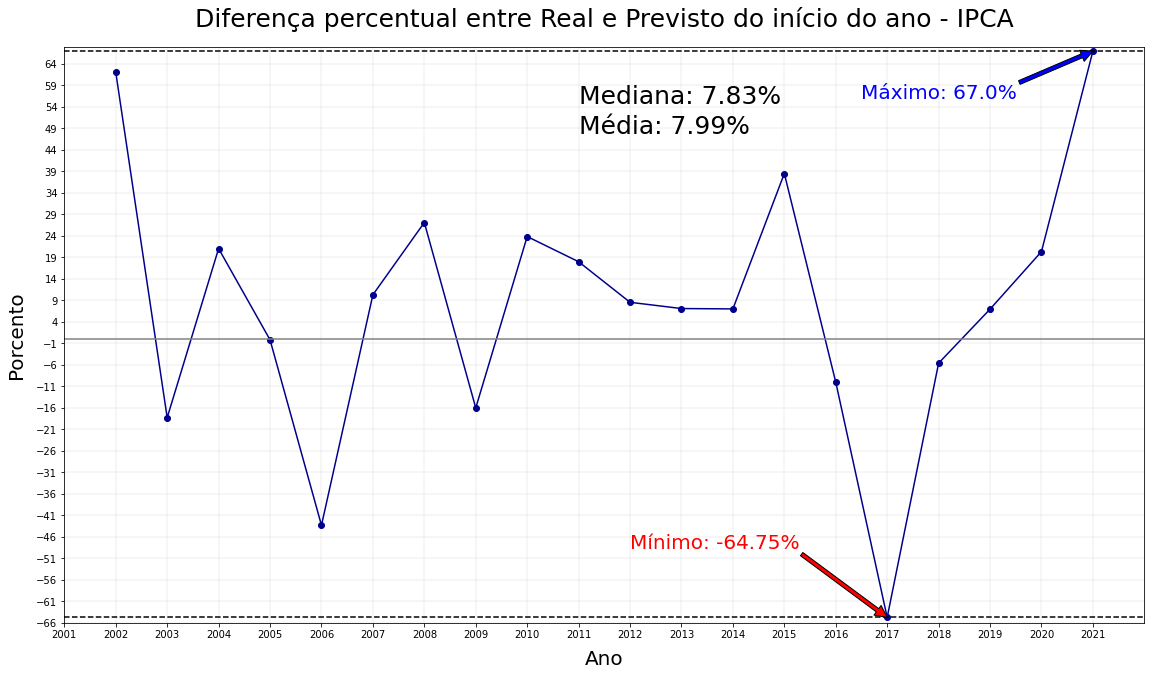

In [229]:
geraGrafico(
    df_dados_finais.DifPercentRealPrevIpcaInicioAno,
    titulo = 'Diferença percentual entre Real e Previsto do início do ano - IPCA',
    titulo_eixo_y = 'Porcento',
    unidade_medida_y='%',
    unidades_eixo_y=5,
    distancia_media_mediana=7,
    deslocmax_x=-6,
    deslocmax_y=-10,
    deslocmin_x=0,
    deslocmin_y=15,
    deslocmed_x=-4,
    deslocmed_y=35
)

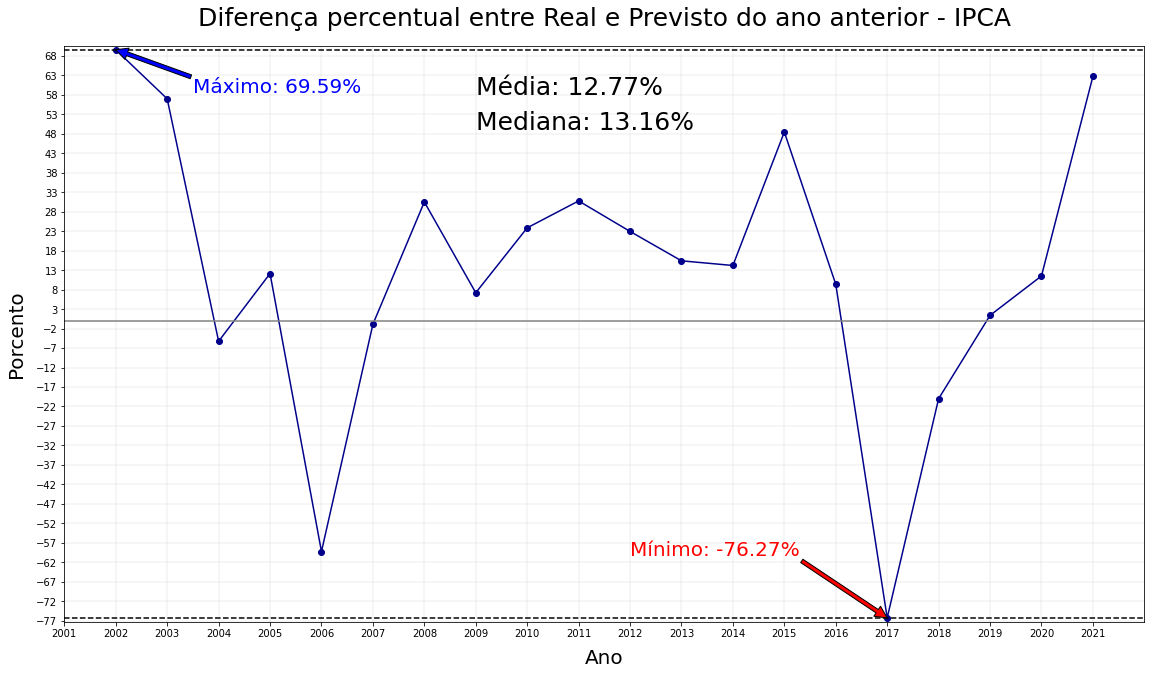

In [230]:
geraGrafico(
    df_dados_finais.DifPercentRealPrevIpcaAnoAnterior,
    titulo = 'Diferença percentual entre Real e Previsto do ano anterior - IPCA',
    titulo_eixo_y = 'Porcento',
    unidade_medida_y='%',
    unidades_eixo_y=5,
    distancia_media_mediana=-9,
    deslocmax_x=0,
    deslocmax_y=-10,
    deslocmin_x=0,
    deslocmin_y=15,
    deslocmed_x=-6,
    deslocmed_y=40
)

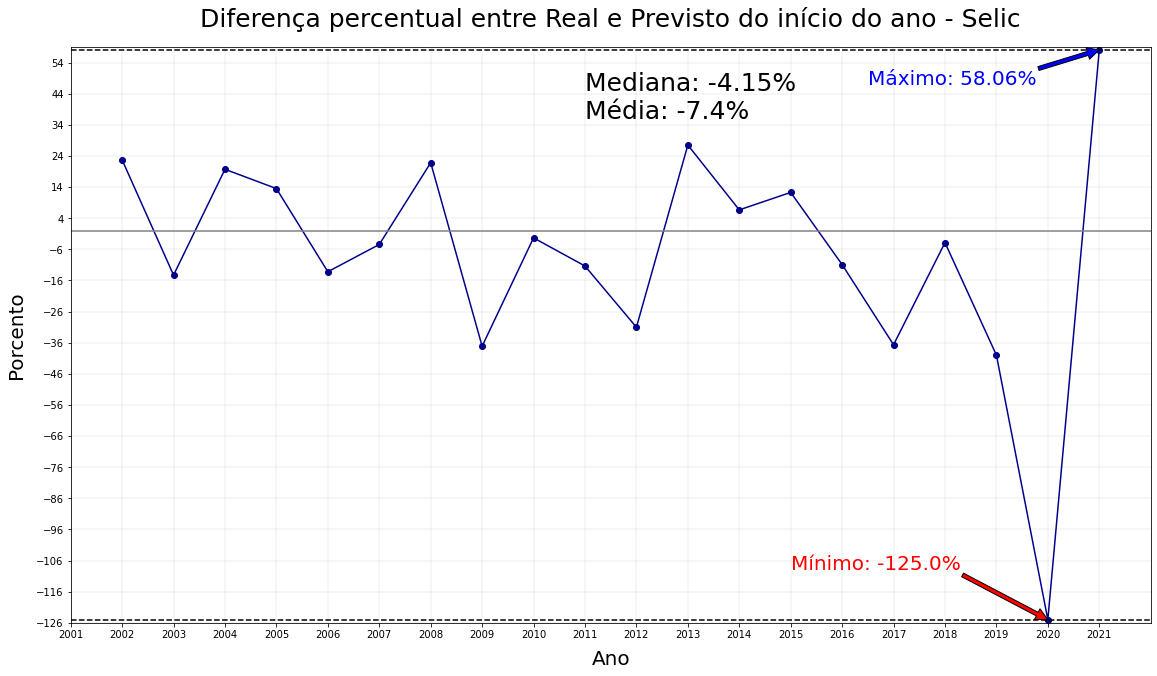

In [231]:
geraGrafico(
    df_dados_finais.DifPercentRealPrevSelicInicioAno,
    titulo = 'Diferença percentual entre Real e Previsto do início do ano - Selic',
    titulo_eixo_y = 'Porcento',
    unidade_medida_y='%',
    unidades_eixo_y=10,
    distancia_media_mediana=9,
    deslocmax_x=-6,
    deslocmax_y=-10,
    deslocmin_x=0,
    deslocmin_y=15,
    deslocmed_x=-4,
    deslocmed_y=35
)

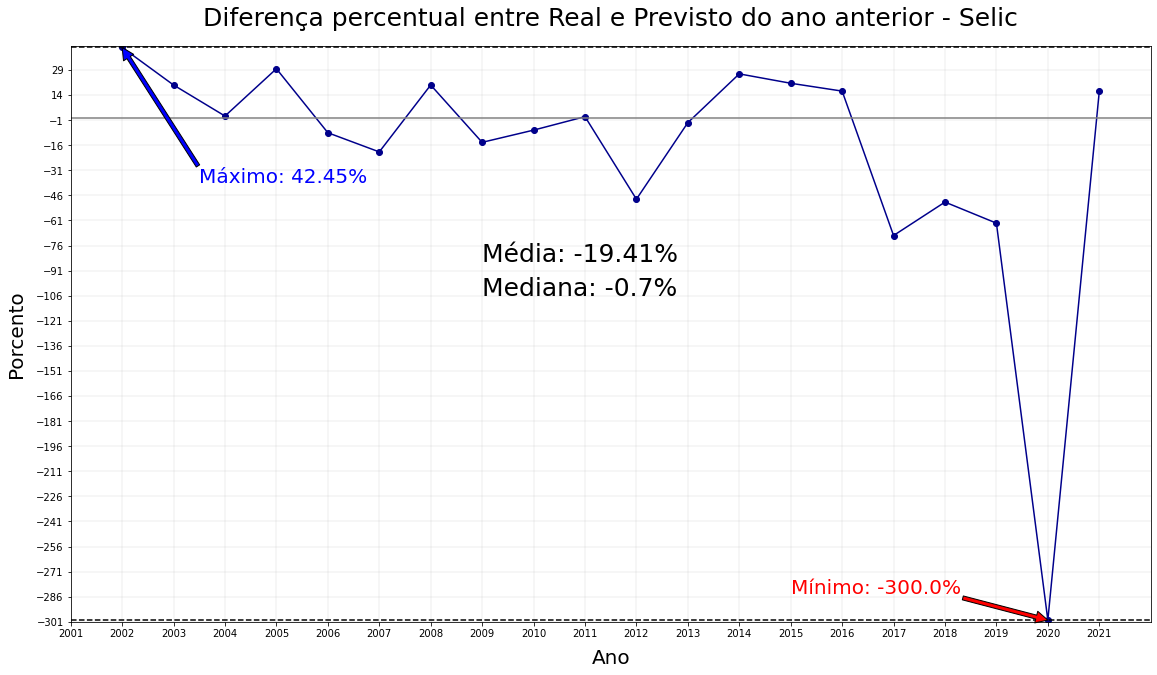

In [232]:
geraGrafico(
    df_dados_finais.DifPercentRealPrevSelicAnoAnterior,
    titulo = 'Diferença percentual entre Real e Previsto do ano anterior - Selic',
    titulo_eixo_y = 'Porcento',
    unidade_medida_y='%',
    unidades_eixo_y=15,
    distancia_media_mediana=-20,
    deslocmax_x=0,
    deslocmax_y=-80,
    deslocmin_x=0,
    deslocmin_y=15,
    deslocmed_x=-6,
    deslocmed_y=-90
)

In [249]:
df_dados_finais.sample(10)

,Data,IPCA,MetaSelic,DataReferencia,PrevIpcaAnoAnterior,PrevIpcaInicioAno,PrevSelicAnoAnterior,PrevSelicInicioAno,DifRealPrevIpcaAnoAnterior,DifRealPrevIpcaInicioAno,DifRealPrevSelicAnoAnterior,DifRealPrevSelicInicioAno,DifPercentRealPrevIpcaAnoAnterior,DifPercentRealPrevIpcaInicioAno,DifPercentRealPrevSelicAnoAnterior,DifPercentRealPrevSelicInicioAno
5,01/12/2007,4.46,11.25,2007,4.5,4.00,13.50,11.75,-0.04,0.46,-2.25,-0.50,-0.896861,10.313901,-20.000000,-4.444444
6,01/12/2008,5.90,13.75,2008,4.1,4.30,11.00,10.75,1.80,1.60,2.75,3.00,30.508475,27.118644,20.000000,21.818182
1,01/12/2003,9.30,17.50,2003,4.0,11.00,14.00,20.00,5.30,-1.70,3.50,-2.50,56.989247,-18.279570,20.000000,-14.285714
18,01/12/2020,4.52,2.00,2020,4.0,3.60,8.00,4.50,0.52,0.92,-6.00,-2.50,11.504425,20.353982,-300.000000,-125.000000
10,01/12/2012,5.84,7.25,2012,4.5,5.34,10.75,9.50,1.34,0.50,-3.50,-2.25,22.945205,8.561644,-48.275862,-31.034483
9,01/12/2011,6.50,11.00,2011,4.5,5.33,10.88,12.25,2.00,1.17,0.12,-1.25,30.769231,18.000000,1.090909,-11.363636
3,01/12/2005,5.69,18.50,2005,5.0,5.70,13.00,16.00,0.69,-0.01,5.50,2.50,12.126538,-0.175747,29.729730,13.513514
13,01/12/2015,10.67,14.25,2015,5.5,6.56,11.25,12.50,5.17,4.11,3.00,1.75,48.453608,38.519213,21.052632,12.280702
11,01/12/2013,5.91,10.00,2013,5.0,5.49,10.25,7.25,0.91,0.42,-0.25,2.75,15.397631,7.106599,-2.500000,27.500000
8,01/12/2010,5.91,10.75,2010,4.5,4.50,11.50,11.00,1.41,1.41,-0.75,-0.25,23.857868,23.857868,-6.976744,-2.325581


In [255]:
resumo

,mean,50%,std,min,max
DifRealPrevIpcaAnoAnterior,1.54,0.80,2.78,-2.25,8.72
DifRealPrevIpcaInicioAno,1.05,0.46,2.52,-1.91,7.78
DifRealPrevSelicAnoAnterior,0.21,-0.07,3.74,-6.00,9.34
DifRealPrevSelicInicioAno,0.15,-0.38,2.61,-3.25,5.00
DifPercentRealPrevIpcaAnoAnterior,12.77,13.16,36.06,-76.27,69.59
DifPercentRealPrevIpcaInicioAno,7.99,7.83,30.91,-64.75,67.00
DifPercentRealPrevSelicAnoAnterior,-19.41,-0.70,73.28,-300.00,42.45
DifPercentRealPrevSelicInicioAno,-7.40,-4.15,37.26,-125.00,58.06
